# Imports & configs

In [8]:
import warnings

# Data handling
import numpy as np
import pandas as pd

# Data visualizations
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import matplotlib.pyplot as plt

# Documentations
from IPython.display import Markdown, display

In [9]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.options.display.max_columns = 999

Reading the train and test datasets

In [10]:
df = pd.read_csv('../input/spaceship-titanic/train.csv')
test_df = pd.read_csv('../input/spaceship-titanic/test.csv')

The training dataset, with the dependent variable (`Transported`)

In [11]:
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


Training set without `Transported` (so one less column)

In [12]:
test_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


In [13]:
print('Train dataset', df.shape,)
print('Test dataset', test_df.shape)

Train dataset (8693, 14)
Test dataset (4277, 13)


some basic stats...

In [14]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Nulls, nulls, nulls

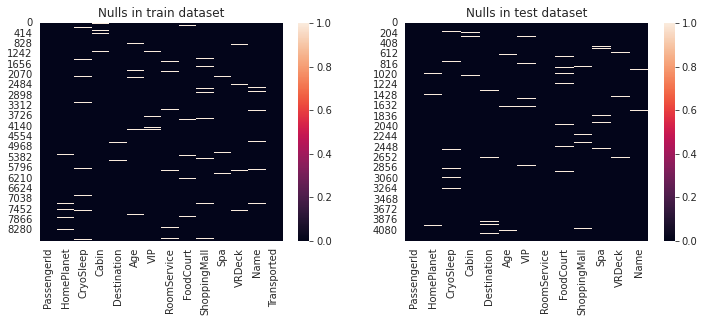

In [15]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.heatmap(pd.isna(df), ax=ax[0])
ax[0].set_title('Nulls in train dataset')

sns.heatmap(pd.isna(test_df), ax=ax[1])
ax[1].set_title('Nulls in test dataset')

plt.show()

Percentage of nulls in different columns..

First the training dataset

In [16]:
def show_null_perc(dataframe: pd.DataFrame, dfname: str) -> None:
    '''
    Displays the nulls as a markdown table
    '''
    strings = [
        f'<big><b>{dfname} dataset Nulls</b></big>',
        '',
        '|#|Column|Percentage of nulls|Type|',
        '|:|:-----|:------------------|:---|'
    ]

    for idx, c in enumerate(dataframe.columns, start=1):
        missing_c = dataframe[pd.isna(dataframe[c])]
        strings.append('|{}|{}|{}%|`{}`|'.format(
            idx, c, round((missing_c.shape[0] / dataframe.shape[0]) * 100, 3),
            'Continuous' if dataframe[c].nunique() > 10 else 'Categorical'
        ))

    display(Markdown('\n'.join(strings)))

In [17]:
show_null_perc(df, 'Train')

<big><b>Train dataset Nulls</b></big>

|#|Column|Percentage of nulls|Type|
|:|:-----|:------------------|:---|
|1|PassengerId|0.0%|`Continuous`|
|2|HomePlanet|2.312%|`Categorical`|
|3|CryoSleep|2.496%|`Categorical`|
|4|Cabin|2.289%|`Continuous`|
|5|Destination|2.094%|`Categorical`|
|6|Age|2.059%|`Continuous`|
|7|VIP|2.335%|`Categorical`|
|8|RoomService|2.082%|`Continuous`|
|9|FoodCourt|2.105%|`Continuous`|
|10|ShoppingMall|2.393%|`Continuous`|
|11|Spa|2.105%|`Continuous`|
|12|VRDeck|2.163%|`Continuous`|
|13|Name|2.301%|`Continuous`|
|14|Transported|0.0%|`Categorical`|

And the test dataset

In [18]:
show_null_perc(test_df, 'Test')

<big><b>Test dataset Nulls</b></big>

|#|Column|Percentage of nulls|Type|
|:|:-----|:------------------|:---|
|1|PassengerId|0.0%|`Continuous`|
|2|HomePlanet|2.034%|`Categorical`|
|3|CryoSleep|2.174%|`Categorical`|
|4|Cabin|2.338%|`Continuous`|
|5|Destination|2.151%|`Categorical`|
|6|Age|2.128%|`Continuous`|
|7|VIP|2.174%|`Categorical`|
|8|RoomService|1.917%|`Continuous`|
|9|FoodCourt|2.478%|`Continuous`|
|10|ShoppingMall|2.291%|`Continuous`|
|11|Spa|2.361%|`Continuous`|
|12|VRDeck|1.87%|`Continuous`|
|13|Name|2.198%|`Continuous`|

# Feature engineering

## `PassengerId`

A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

In [19]:
# Looking at individual columns
df.PassengerId.head()
# This takes the form of gggg_pp,
# where gggg indicates a group the passenger is travelling with and `pp` is their
# number within the group.

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object

In [20]:
df['GID'] = df.PassengerId.apply(lambda x: x.split('_')[0])
df['PID'] = df.PassengerId.apply(lambda x: x.split('_')[1])

In [21]:
test_df['GID'] = test_df.PassengerId.apply(lambda x: x.split('_')[0])
test_df['PID'] = test_df.PassengerId.apply(lambda x: x.split('_')[1])

## `LastName`

In [22]:
def get_last_name(name: str) -> str:
    if pd.isna(name): return ''
    else: return name.split(' ')[1]

In [23]:
df['LastName'] = df.Name.apply(lambda x: get_last_name(x))
test_df['LastName'] = test_df.Name.apply(lambda x: get_last_name(x))

## `Cabin`

The cabin number where the passenger is stayin. Takes the form `deck/num/side`, where side can be either `P` or Port or `S` for Starboard.

In [24]:
# Breaking cabin into deck, num & side

d, n, s = [], [], []
td, tn, ts = [], [], []

# Seperating the values from the training dataset
for _, row in df.iterrows():
    if pd.isna(row.Cabin):
        for l in (d, n, s):
            l.append(np.nan)
    else:
        x = row.Cabin.split('/')
        d.append(x[0])
        n.append(x[1])
        s.append(x[2])

# Seperating the values from the test dataset
for _, row in test_df.iterrows():
    if pd.isna(row.Cabin):
        for l in (td, tn, ts):
            l.append(np.nan)
    else:
        x = row.Cabin.split('/')
        td.append(x[0])
        tn.append(x[1])
        ts.append(x[2])

In [25]:
df['Deck'] = d; df['Num'] = n; df['Side'] = s

In [26]:
test_df['Deck'] = td; test_df['Num'] = tn; test_df['Side'] = ts

# Handling nulls

Now before we go ahead with our feature engineering we need to make sure we handle the nulls (our other independent variables) properly.

## Imports necessary

In [27]:
from sklearn.preprocessing import (LabelEncoder, 
                                   MinMaxScaler)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (train_test_split, 
                                     KFold, cross_val_score,
                                     GridSearchCV)
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             classification_report,
                             precision_score,
                             recall_score,
                             f1_score,)
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error)
import statsmodels.api as sm
from typing import List, Dict

## Writing the imputation methods

Creating a dictionary containing label encoders, for all the columns we'd have to encode

In [28]:
def get_encoder_dictionary(df: pd.DataFrame, test_df: pd.DataFrame, encode_cols: List[str], **kwargs) -> Dict[str, LabelEncoder]:
    encoders: Dict[str, LabelEncoder] = {}
    
    # For every column we're fitting the encoder
    # with all non null values and save it in the
    # encoders dictionary with the key `column`
    for column in encode_cols:
        l = LabelEncoder(**kwargs)
        non_null_values: List[Any] = df[~pd.isna(df[column])][column].tolist()
        if column != 'Transported':
            non_null_values.extend(
                test_df[~pd.isna(test_df[column])][column].tolist()
            )
        l.fit(non_null_values)
        encoders[column] = l
    
    return encoders

Let's use the method to make sure everything is working as we want it too

In [29]:
# Columns we'd like to encode
encode_cols = ('HomePlanet', 'CryoSleep', 'Destination', 
               'VIP', 'Transported', 'Deck', 'Side', 
               'LastName', 'GID')

encoders = get_encoder_dictionary(df, test_df, encode_cols)

In [30]:
encoders

{'HomePlanet': LabelEncoder(),
 'CryoSleep': LabelEncoder(),
 'Destination': LabelEncoder(),
 'VIP': LabelEncoder(),
 'Transported': LabelEncoder(),
 'Deck': LabelEncoder(),
 'Side': LabelEncoder(),
 'LastName': LabelEncoder(),
 'GID': LabelEncoder()}

Now for the method that'll impute the missing values in the rows. Note that we're imputing values in the independent variables, so the performance of the models does not matter that much, so ideally to see how the models are doing we'll be including some visualizations as well

After analyzing the types of missing values there are usually 3 main ways to impute missing values in a dataset.

- Imputing with central tendencies (mean, median, mode etc)
- Dropping the nulls (Dropping the rows containing nulls outright)
- Predicting the values of the nulls using other independent variables in the dataset.

Usually the third one is not seen that often in the wild since it is a very involved process. However we know that a model seeing all the associations will predict better values for the nulls than us doing confiditional imputations

In [31]:
def test_model(model, X, y, ax, target, type_):
    (X_train, 
     X_test, 
     y_train, 
     y_test) = train_test_split(X, y, 
                                test_size=0.15, 
                                random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    if type_ == 'C':
        sns.heatmap(
            confusion_matrix(y_test, preds),
            annot=True, fmt='.0f', ax=ax,
            linewidth=2, cbar=False,
            annot_kws={'size': 15}
        )
        ax.set_title('[{}] Confusion-matrix (Accuracy: {})'.format(
            target, 
            round(accuracy_score(y_test, preds), 2), 
        ), fontsize=25)
    elif type_ == 'R':
        mse = mean_squared_error(y_test, preds)
        mae = mean_absolute_error(y_test, preds)
        sm.qqplot(y_test-preds, fit=True, line='45', ax=ax, markersize=10)
        ax.set_title('[{}] QQ-Plot (RMSE: {} - MAE: {})'.format(
            target, 
            round(np.sqrt(mse), 2), 
            round(mae, 2)
        ), fontsize=25)

In [32]:
def impute_with_model(
    df: pd.DataFrame,
    test_df: pd.DataFrame,
    target: str,
    encoders: Dict[str, LabelEncoder],
    exclude_cols: List[str],
    type_: str='C',
    test: bool=True,
    ax=None
) -> pd.DataFrame:
    
    # Exit condition
    if df[pd.isna(df[target])].shape[0] == 0:
        return (df, test_df)
    
    model = DecisionTreeClassifier() if type_ == 'C' else LinearRegression()
    
    # Columns that're to be used for this model
    include_cols = [x for x in df.columns if x not in exclude_cols]
    
    # Making a copy of the dataframe
    temp = df[include_cols].copy(deep=True)
    temp_test = test_df[include_cols].copy(deep=True)
    
    # Dropping the nulls
    temp = temp.dropna()
    temp_test = temp_test.dropna()
    
    for c in temp.columns:
        if c in encoders:
            temp[c] = encoders[c].transform(temp[c])
            temp_test[c] = encoders[c].transform(temp_test[c])
    
    # Train using these
    X, y = (
        temp[[x for x in df.columns if x not in exclude_cols + [target]]],
        temp[target]
    )
    
    # Predict these later on
    X_test = temp_test[X.columns]
    
    if test and ax:
        test_model(model, X, y, ax, target, type_)
    
    # Final training with the entire dataset
    model.fit(X, y)
    
    # Processing the entire dataframe for prediction
    X_new = df[pd.isna(df[target])][X.columns].dropna()
    X_test_new = test_df[pd.isna(test_df[target])][X.columns].dropna()
    
    # Encoding the values for prediction
    for column, encoder in encoders.items():
        if column in X_new.columns:
            X_new[column] = encoder.transform(X_new[column])
            X_test_new[column] = encoder.transform(X_test_new[column])
    
    # Making predictions
    preds = model.predict(X_new)
    test_preds = model.predict(X_test_new)
    
    if type_ == 'C':
        labels = encoders[target].inverse_transform(preds)
        test_labels = encoders[target].inverse_transform(test_preds)
    else:
        labels = df[target].tolist()
        test_labels = test_df[target].tolist()
    
    # Adding the predictions to respective columns
    idx_preds_mapping: List[Tuple[int, str]] = list(zip(X_new.index.tolist(), labels))
    test_idx_preds_mapping = list(zip(X_test_new.index.tolist(), test_labels))
    
    for idx, p in idx_preds_mapping:
        df.loc[df.index==idx, target] = p

    for idx, p in test_idx_preds_mapping:
        test_df.loc[test_df.index==idx, target] = p

    x = df[target].mode().iloc[0] if type_ == 'C' else df[target].median()
    df.loc[pd.isna(df[target]), target] = x
        
    x = test_df[target].mode().iloc[0] if type_ == 'C' else test_df[target].median()
    test_df.loc[pd.isna(test_df[target]), target] = x
    
    return df, test_df

In [33]:
# Columns to exclude

exclude_columns = ['PassengerId', 'Cabin', 'PID', 'Name', 'Transported', 'GID']

In [34]:
encoders

{'HomePlanet': LabelEncoder(),
 'CryoSleep': LabelEncoder(),
 'Destination': LabelEncoder(),
 'VIP': LabelEncoder(),
 'Transported': LabelEncoder(),
 'Deck': LabelEncoder(),
 'Side': LabelEncoder(),
 'LastName': LabelEncoder(),
 'GID': LabelEncoder()}

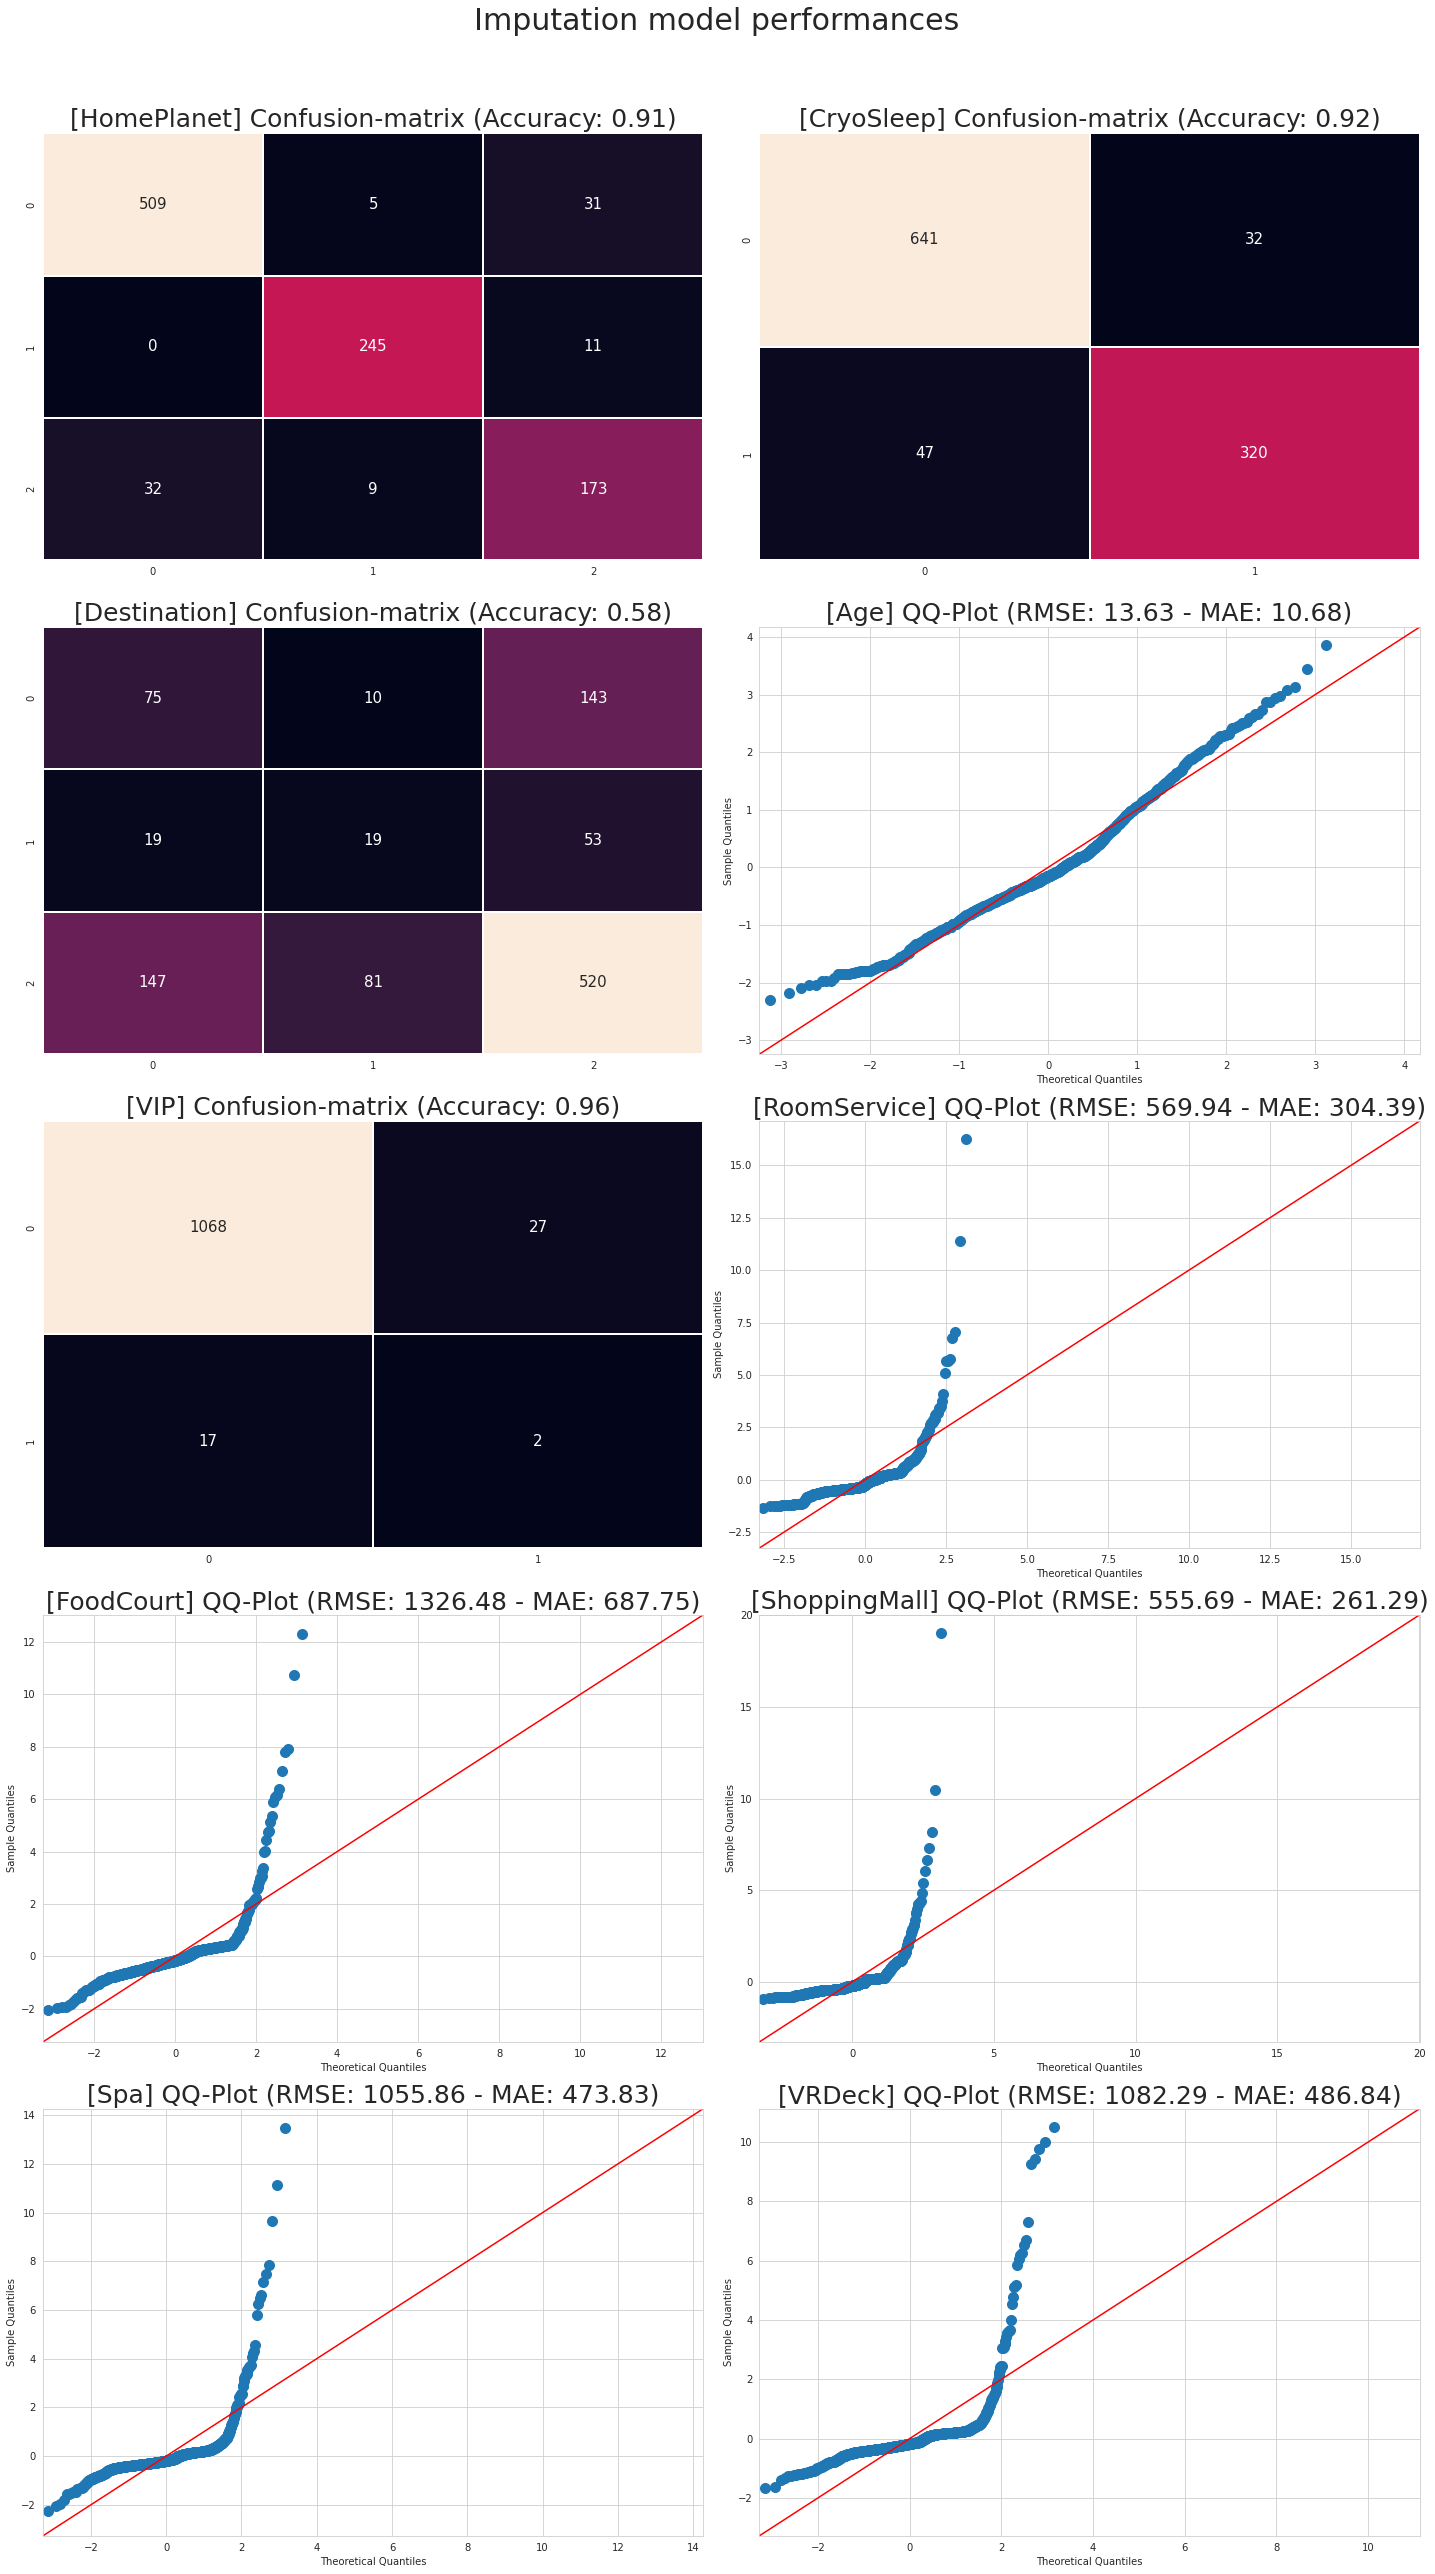

In [35]:
NROWS, NCOLS = 5, 2
_, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(20, 35))

cols_to_impute = [
    ('HomePlanet', 'C'), ('CryoSleep', 'C'), ('Destination', 'C'),
    ('Age', 'R'), ('VIP', 'C'), ('RoomService', 'R'), ('FoodCourt', 'R'), 
    ('ShoppingMall', 'R'), ('Spa', 'R'), ('VRDeck', 'R')
]

idx = 0
for i in range(NROWS):
    for j in range(NCOLS):
        col, type_ = cols_to_impute[idx]
        df, test_df = impute_with_model(
            df, test_df,
            col, 
            encoders, 
            exclude_columns,
            type_=type_,
            test=True,
            ax=ax[i][j]
        )
        idx += 1

plt.suptitle('Imputation model performances', x=.5, y=1.02, fontsize=30)
plt.tight_layout()
plt.show()

In [36]:
df.loc[pd.isna(df.Deck), 'Deck'] = df.Deck.mode().iloc[0]
df.loc[pd.isna(df.Num), 'Num'] = df.Num.mode().iloc[0]
df.loc[pd.isna(df.Side), 'Side'] = df.Side.mode().iloc[0]

In [37]:
test_df.loc[pd.isna(test_df.Deck), 'Deck'] = test_df.Deck.mode().iloc[0]
test_df.loc[pd.isna(test_df.Num), 'Num'] = test_df.Num.mode().iloc[0]
test_df.loc[pd.isna(test_df.Side), 'Side'] = test_df.Side.mode().iloc[0]

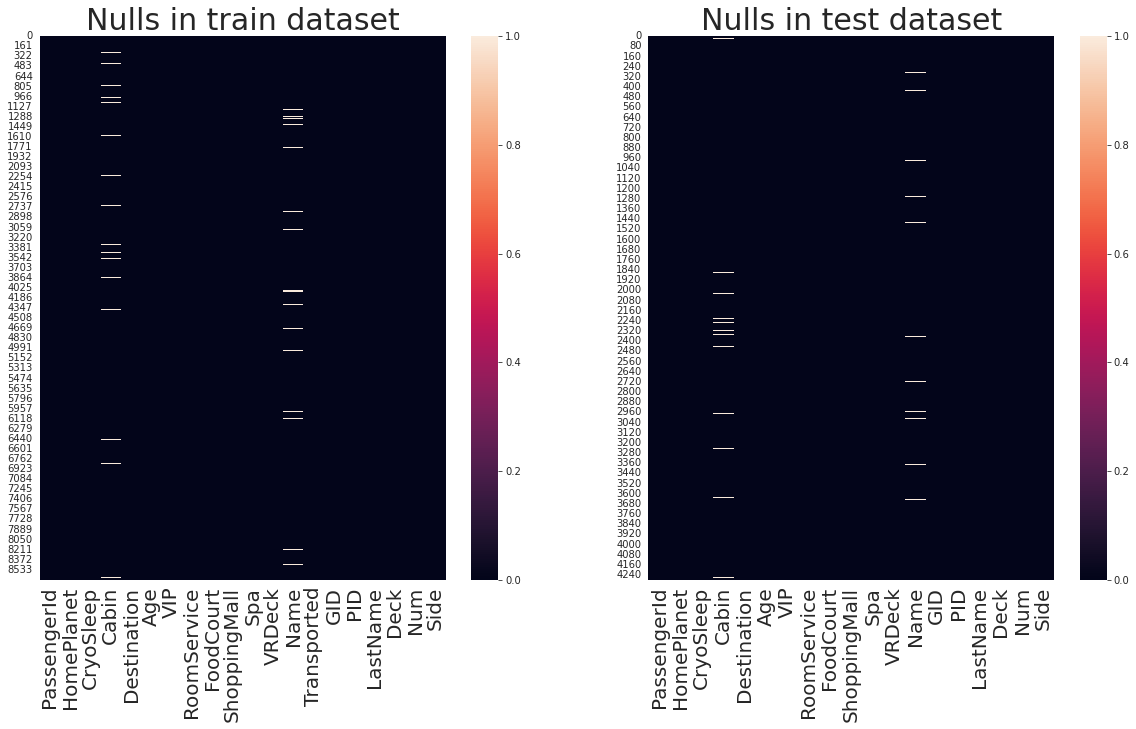

In [38]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

sns.heatmap(pd.isna(df), ax=ax[0])
ax[0].set_title('Nulls in train dataset', fontsize=30)
ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=20)

sns.heatmap(pd.isna(test_df), ax=ax[1])
ax[1].set_title('Nulls in test dataset', fontsize=30)
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=20)


plt.show()

# Feature engineering

## Creating new attribute `TotalSpent`

Using the attributes `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` to compute the `TotalSpent` values

In [39]:
df['TotalSpent'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].apply(
    lambda x: sum(x),
    axis=1
)

test_df['TotalSpent'] = test_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].apply(
    lambda x: sum(x),
    axis=1
)

In [40]:
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GID,PID,LastName,Deck,Num,Side,TotalSpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,Ofracculy,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,Vines,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,Susent,A,0,S,10383.0


# Encoding the categorical columns

In [41]:
for attribute in encoders:
    df[attribute] = encoders[attribute].transform(df[attribute])

In [42]:
for attribute in encoders:
    if attribute == 'Transported':
        continue
    test_df[attribute] = encoders[attribute].transform(test_df[attribute])

# Correlation

In [43]:
df_corr = df.corr()

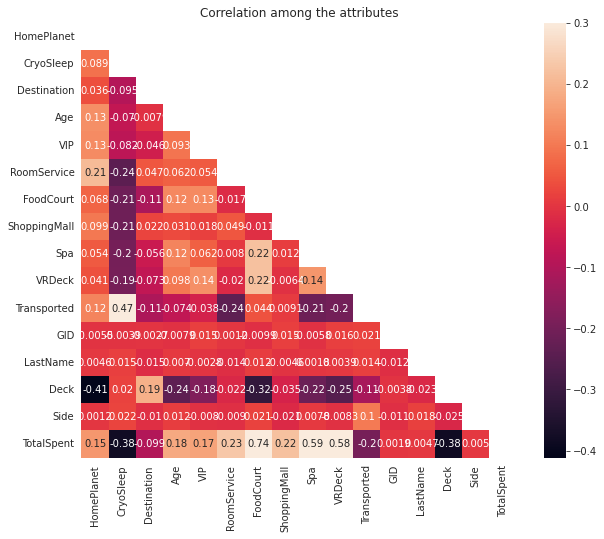

In [44]:
corr = np.corrcoef(np.random.randn(*list(df_corr.shape)))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), square=True, linewidths=0, vmax=.3, annot=True, mask=mask)

plt.title('Correlation among the attributes')
plt.show()

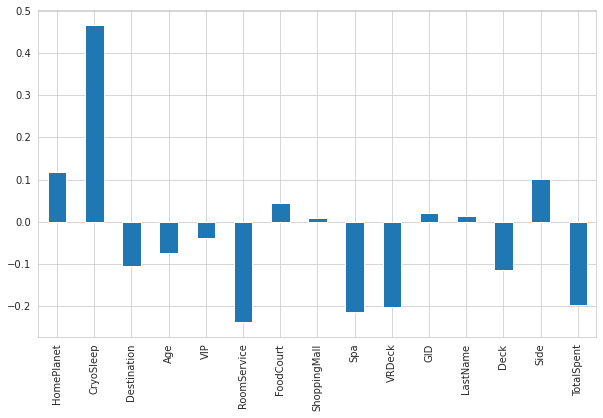

In [45]:
plt.figure(figsize=(10, 6))
df_corr.Transported.drop('Transported').plot(kind='bar')
plt.show()

# Final preprocessing

In [46]:
drop_cols = ['PassengerId', 'Cabin', 'Name',]

X = df.drop(drop_cols + ['Transported'], axis=1).copy(deep=True)
y = df.Transported

test = test_df.drop(drop_cols, axis=1).copy(deep=True)

## Scaling the dataframes

In [47]:
scaler = MinMaxScaler()
scaler = scaler.fit(X)

# Scaling the dataframes
X = pd.DataFrame(scaler.transform(X), columns=X.columns)
test = pd.DataFrame(scaler.transform(test), columns=X.columns)

## Train test split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, y_test.shape, test.shape

((6954, 17), (1739,), (4277, 17))

# Methods

In [49]:
# Method

performances = []

def show_confusion_matrix(conf_matrix, **kwargs):
    plt.figure(figsize=(7, 7))
    sns.set(font_scale=1.7)
    sns.heatmap(conf_matrix, annot=True, cbar=False, fmt='.0f', **kwargs)
    sns.set(font_scale=1)

def getModelReport(model, X_train, y_train, X_test, y_test, msg=np.nan):

    preds = model.predict(X_test)
    accuracy = accuracy_score(preds, y_test)
    precision = precision_score(preds, y_test)
    recall = recall_score(preds, y_test)
    f1 = f1_score(preds, y_test)
    conf_matrix = confusion_matrix(preds, y_test)
    clf_report = classification_report(preds, y_test)
    model_class = model.__class__.__name__
    
    # Creating Cross validation scores
    kfold_vc = KFold(n_splits=10)
    results = cross_val_score(model, X_train, y_train, cv=kfold_vc)
    
    # Saving the performances
    performances.append(
        [model_class, accuracy, results.mean(), f1, msg]
    )
    
    print('*'*60)
    print('{}'.format(model_class).rjust(40, ' '))
    print('*'*60)
    print('ACCURACY K-Fold:', results.mean())
    print('ACCURACY:', accuracy)
    print('F1 SCORE:', f1)
    print('CLASSIFICATION REPORT: ')
    print(clf_report)
    print('*'*60)
    
    show_confusion_matrix(conf_matrix)
    plt.title('Confusion matrix of {}'.format(model_class))
    plt.show()

# GradientBoostingClassifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
grad = GradientBoostingClassifier()
grad = grad.fit(X_train, y_train)

************************************************************
              GradientBoostingClassifier
************************************************************
ACCURACY K-Fold: 0.8032806168858017
ACCURACY: 0.7918343875790684
F1 SCORE: 0.8034744842562432
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       775
           1       0.84      0.77      0.80       964

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.80      0.79      0.79      1739

************************************************************


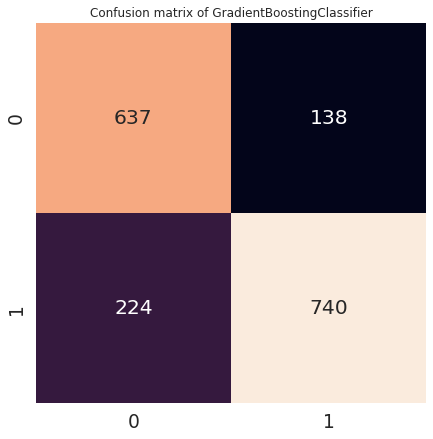

In [52]:
getModelReport(grad, X_train, y_train, X_test, y_test)

## Grid search

In [53]:
gradboost_param_grid = dict(
    loss=['deviance', 'exponential'],
    learning_rate=[0.01,0.1,0.5],
    n_estimators=[50, 100, 250],
    min_samples_split=[2, 10, 50]
)

In [54]:
grid = GridSearchCV(
    GradientBoostingClassifier(), 
    param_grid=gradboost_param_grid, 
    n_jobs=-1, verbose=3
)

grid = grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 3/5] END learning_rate=0.01, loss=deviance, min_samples_split=2, n_estimators=50;, score=0.756 total time=   1.1s
[CV 2/5] END learning_rate=0.01, loss=deviance, min_samples_split=2, n_estimators=100;, score=0.761 total time=   1.9s
[CV 1/5] END learning_rate=0.01, loss=deviance, min_samples_split=2, n_estimators=250;, score=0.793 total time=   4.8s
[CV 5/5] END learning_rate=0.01, loss=deviance, min_samples_split=2, n_estimators=250;, score=0.801 total time=   4.7s
[CV 2/5] END learning_rate=0.01, loss=deviance, min_samples_split=10, n_estimators=250;, score=0.794 total time=   4.5s
[CV 1/5] END learning_rate=0.01, loss=deviance, min_samples_split=50, n_estimators=50;, score=0.753 total time=   0.9s
[CV 2/5] END learning_rate=0.01, loss=deviance, min_samples_split=50, n_estimators=50;, score=0.761 total time=   0.9s
[CV 5/5] END learning_rate=0.01, loss=deviance, min_samples_split=50, n_estimators=50;, score=0.780 total

# Evaluation Dataframe

In [55]:
perf = pd.DataFrame(
    performances,
    columns='Model Accuracy KFoldAcc F1 Message'.split()
)
perf

,Model,Accuracy,KFoldAcc,F1,Message
0,GradientBoostingClassifier,0.791834,0.803281,0.803474,NaN


# Submission

Training with the full dataset

In [56]:
grad = grad.fit(X, y)

In [58]:
test_df['Transported'] = encoders['Transported'].inverse_transform(
    grad.predict(test)
)
test_df[['PassengerId', 'Transported']].to_csv('submission.csv', index=False)


[CV 1/5] END learning_rate=0.5, loss=exponential, min_samples_split=2, n_estimators=50;, score=0.786 total time=   1.0s
[CV 2/5] END learning_rate=0.5, loss=exponential, min_samples_split=2, n_estimators=50;, score=0.814 total time=   1.0s
[CV 5/5] END learning_rate=0.5, loss=exponential, min_samples_split=2, n_estimators=50;, score=0.814 total time=   1.0s
[CV 3/5] END learning_rate=0.5, loss=exponential, min_samples_split=2, n_estimators=100;, score=0.795 total time=   1.9s
[CV 2/5] END learning_rate=0.5, loss=exponential, min_samples_split=2, n_estimators=250;, score=0.802 total time=   4.6s
[CV 1/5] END learning_rate=0.5, loss=exponential, min_samples_split=10, n_estimators=50;, score=0.792 total time=   0.9s
[CV 2/5] END learning_rate=0.5, loss=exponential, min_samples_split=10, n_estimators=50;, score=0.809 total time=   0.9s
[CV 5/5] END learning_rate=0.5, loss=exponential, min_samples_split=10, n_estimators=50;, score=0.811 total time=   0.9s
[CV 3/5] END learning_rate=0.5, lo